<a href="https://colab.research.google.com/github/anuragprasad95/loan_default_prediction_using_PCA/blob/main/Loan_Default_Prediction__using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actually I have learnt this from the Kaggle Competition organized by researchers at Imperial College London.

Aim - Loan Default Prediction

Competition Link: https://www.kaggle.com/competitions/loan-default-prediction

Description: The contets wants you to figure out if a loan will not be paid back, and if it isn't, how much money will be lost. Instead of just saying if someone is good or bad at repaying loans, like usual, we're trying to predict both if they won't pay and how much money will be lost if they dont. This helps connect regular banking, where we try to lower the amount of money we might lose, to investment, where we focus on the risks for the people invetsing money.

And it was evaluated based on mean absolute error (MAE):
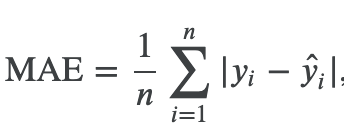

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/Loan_Default/train_v2.csv")

<ipython-input-3-0b170d49e585>:1: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/Loan_Default/train_v2.csv")


In [31]:
test_data = pd.read_csv("/content/drive/MyDrive/Loan_Default/test_v2.csv")

<ipython-input-31-642d0eb87db9>:1: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("/content/drive/MyDrive/Loan_Default/test_v2.csv")


View Dataframe

Train Data

In [10]:
train_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


Total Test dataset Rows & Columns = (105471, 771)

In [12]:
train_data.shape

(105471, 771)

Test Data

In [11]:
test_data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


Total Test dataset Rows & Column = (210944, 770)

In [13]:
test_data.shape

(210944, 770)

Data Information

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210944 entries, 0 to 210943
Columns: 770 entries, id to f778
dtypes: float64(654), int64(96), object(19), uint64(1)
memory usage: 1.2+ GB


Missing Values/Null Values

<Axes: >

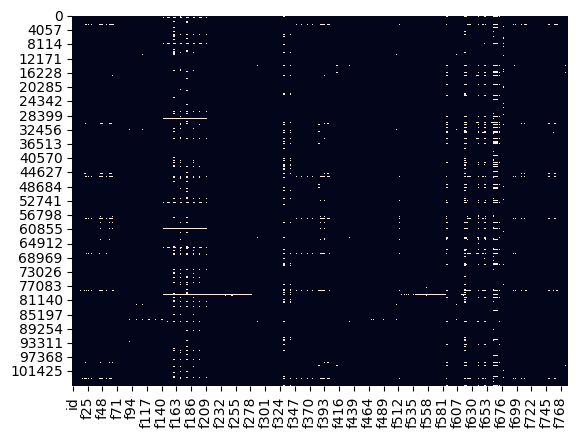

In [4]:
sns.heatmap(train_data.isnull(), cbar=False)

In [17]:
missing = train_data.isnull().sum()
missing = pd.DataFrame(missing[missing!=0])
missing.columns = ['No. of missing values']
missing['Percentage'] = 100*missing['No. of missing values']/train_data.id.count()
missing.sort_values(by="Percentage", ascending=False)

,No. of missing values,Percentage
f662,18833,17.856093
f663,18833,17.856093
f159,18736,17.764125
f160,18736,17.764125
f170,18417,17.461672
...,...,...
f677,1,0.000948
f675,1,0.000948
f765,1,0.000948
f678,1,0.000948


Drop columns having incorrect dtype

In [4]:
train_data.select_dtypes(include=['object']).head()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,137000000000,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,9483264,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,36051866452,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,5621900678,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,279000000000,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


In [4]:
invalid = train_data.select_dtypes(include=['object']).columns
train_data.drop(invalid, axis=1, inplace=True)

In [27]:
test_data.drop(invalid, axis=1, inplace=True)
t_id = test_data['id'].copy
test_data.drop('id', axis=1, inplace = True)

Describe Statistics

In [11]:
train_data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,...,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,...,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,...,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,...,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,...,11.000000,3.570000,-2.600000,1.990000,0.251800,0.375400,0.000000,0.000000,40.000000,0.000000
75%,79103.500000,148.000000,9.000000,0.749494,3700.000000,10.000000,80135.000000,4679.000000,3411.000000,149.080000,...,23.000000,7.700000,-1.010000,4.440000,0.283600,0.737100,1.000000,1.000000,104.000000,0.000000
max,105471.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88565.000000,9968.000000,11541.000000,172.950000,...,168.000000,58.120000,0.000000,34.040000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


In [12]:
test_data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
count,210944.000000,210944.000000,210944.000000,210944.000000,210080.000000,210944.000000,210568.000000,210792.000000,210944.000000,210944.000000,...,210944.000000,210944.000000,210944.000000,210944.000000,210944.000000,208878.000000,207984.000000,210944.000000,210944.000000,210944.000000
mean,135.125085,8.220011,0.501206,2711.977586,7.805027,53153.425582,3310.628196,2779.705928,135.144399,135.129890,...,-8.832556,17.532539,5.824868,-4.258049,3.275899,0.234896,0.026736,0.293576,0.340754,210.792277
std,14.896286,1.712893,0.289458,1415.640909,5.402407,35172.502441,2958.323661,2642.629935,14.073423,14.696504,...,9.624229,18.608292,6.427181,4.745248,3.686927,0.073238,1.037437,0.455401,0.473964,322.843199
min,103.000000,1.000000,0.000009,1100.000000,1.000000,0.000000,1.000000,1.000000,103.830000,103.000000,...,-92.930000,1.000000,0.000000,-43.750000,0.000000,0.000000,-21.802600,0.000000,0.000000,2.000000
25%,124.000000,8.000000,0.250245,1500.000000,4.000000,12622.000000,665.000000,835.000000,124.500000,124.030000,...,-11.630000,5.000000,1.530000,-5.750000,0.770000,0.200000,-0.687700,0.000000,0.000000,20.000000
50%,130.000000,8.000000,0.502330,2200.000000,4.000000,76973.000000,2393.000000,2001.000000,128.750000,129.350000,...,-5.570000,11.000000,3.670000,-2.670000,2.040000,0.252300,0.390400,0.000000,0.000000,46.000000
75%,149.000000,9.000000,0.753047,3700.000000,15.000000,81447.000000,5504.000000,3844.000000,150.300000,149.480000,...,-2.460000,23.000000,7.780000,-1.060000,4.470000,0.284000,0.732325,1.000000,1.000000,393.000000
max,176.000000,11.000000,0.999991,7900.000000,17.000000,90032.000000,11441.000000,13374.000000,173.030000,175.220000,...,0.000000,170.000000,61.220000,0.000000,32.610000,0.468100,7.353100,1.000000,1.000000,1212.000000


Correlations

To look at those features having very high correlations among themselves.

In [19]:
correlations = train_data.iloc[:,1:752].corr()
correlations.head())

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
f1,1.000000,-0.210388,-0.000370,0.782389,-0.269849,0.102250,-0.160392,-0.174056,0.972323,0.998662,...,-0.081408,-0.044220,0.036631,-0.031180,0.003592,0.067034,0.078637,0.873927,-0.270134,-0.008231
f2,-0.210388,1.000000,0.003149,-0.215980,0.221009,0.091765,-0.131591,-0.155965,-0.248444,-0.218659,...,0.078232,-0.020417,0.044855,-0.063950,-0.023559,-0.176774,-0.097982,-0.225693,0.221553,-0.000588
f3,-0.000370,0.003149,1.000000,0.000040,0.002255,0.003789,0.001305,-0.003281,-0.000905,-0.000504,...,0.001931,0.002581,-0.002818,0.002964,-0.003372,-0.005909,-0.001653,0.000149,-0.000504,0.000785
f4,0.782389,-0.215980,0.000040,1.000000,-0.256425,0.119798,-0.231372,-0.209896,0.832383,0.794265,...,-0.108024,-0.088417,0.085026,-0.082677,-0.026078,0.037114,0.038133,0.875710,-0.262051,-0.005019
f5,-0.269849,0.221009,0.002255,-0.256425,1.000000,-0.055828,0.108960,-0.006699,-0.284146,-0.273604,...,0.084125,0.068390,-0.065340,0.063015,0.044906,-0.013944,-0.036634,-0.303485,0.770800,0.003902


Splitting Train_dataest into (Train:Test)

In [5]:
x = train_data.iloc[:,1:751].copy()
y = train_data.iloc[:,751].copy()
y.value_counts()

loss
0     95688
2      1297
1      1145
3      1086
4      1038
      ...  
52        1
63        1
55        1
76        1
80        1
Name: count, Length: 89, dtype: int64

We first convert y to binary

In [6]:
y[y>0] = 1
y.value_counts()

loss
0    95688
1     9783
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state=0)

In [23]:
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(79103, 750), (26368, 750), (79103,), (26368,)]

Missing Value Treatment

In [8]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [28]:
test_data = test_data.fillna(X_train.mean())
[X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), test_data.isnull().sum().sum()]

[0, 0, 0]

Standardization of Variables

As we know, PCA is effected by scale, so, we need to scale all the features into standard units (mean=0,variabce=1).

In [10]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
X_t = scalar.transform(test_data)

PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA()

In [18]:
pca.fit(X_train)

PCA()

In [23]:
pca.components_

array([[ 3.47696011e-03,  1.99977563e-02,  1.70905681e-04, ...,
        -1.72757411e-02,  7.11573973e-03,  9.13223080e-04],
       [-1.29826957e-02, -2.37817012e-02, -3.46095804e-05, ...,
        -1.54002287e-02, -2.63867139e-02,  7.07383123e-03],
       [-6.91479824e-03, -6.89868143e-03, -4.43912457e-04, ...,
         3.72167242e-04, -7.20006023e-04, -1.17199698e-02],
       ...,
       [-0.00000000e+00, -9.77416343e-20,  3.74466805e-19, ...,
        -1.20379617e-19,  1.31783077e-19, -2.49665038e-20],
       [ 7.08931078e-01,  4.99600361e-16, -4.71844785e-16, ...,
         2.77555756e-17,  3.88578059e-16, -2.08166817e-17],
       [ 0.00000000e+00,  5.47305257e-16, -1.22113211e-15, ...,
        -6.07153217e-17, -1.11022302e-16,  1.47451495e-17]])

In [24]:
pca.explained_variance_

array([1.23604627e+02, 1.11936499e+02, 5.55608556e+01, 4.32052530e+01,
       4.09477507e+01, 2.45656411e+01, 1.62882842e+01, 1.37845334e+01,
       1.25132286e+01, 1.09379638e+01, 1.03781953e+01, 7.92760579e+00,
       7.46072616e+00, 7.25082054e+00, 7.00526831e+00, 6.52020044e+00,
       5.81084820e+00, 5.56581436e+00, 5.29152595e+00, 5.14759733e+00,
       5.00708210e+00, 4.83048187e+00, 4.69607176e+00, 4.55082003e+00,
       4.41897454e+00, 3.89032476e+00, 3.82605897e+00, 3.45482288e+00,
       3.41519473e+00, 3.18270823e+00, 3.16124974e+00, 3.03315453e+00,
       2.93461381e+00, 2.87223308e+00, 2.83834564e+00, 2.70021413e+00,
       2.62324811e+00, 2.54184751e+00, 2.51164025e+00, 2.48161505e+00,
       2.35110628e+00, 2.21158521e+00, 2.19785219e+00, 2.17510463e+00,
       2.11176548e+00, 2.09010322e+00, 2.07186067e+00, 2.04166787e+00,
       1.99609086e+00, 1.92066997e+00, 1.89295962e+00, 1.85104367e+00,
       1.83095632e+00, 1.81425243e+00, 1.77887178e+00, 1.74800418e+00,
      

In [25]:
pca.get_covariance()

array([[ 1.00001264e+00, -2.14467016e-01, -1.17276496e-03, ...,
         7.90998945e-02,  8.74911439e-01, -2.71304665e-01],
       [-2.14467016e-01,  1.00001264e+00,  5.61198145e-03, ...,
        -9.59199832e-02, -2.28613072e-01,  2.23969475e-01],
       [-1.17276496e-03,  5.61198145e-03,  1.00001264e+00, ...,
         9.46882014e-04, -5.76048934e-04,  2.55113842e-03],
       ...,
       [ 7.90998945e-02, -9.59199832e-02,  9.46882014e-04, ...,
         1.00001264e+00,  1.19896601e-01, -4.23844356e-02],
       [ 8.74911439e-01, -2.28613072e-01, -5.76048934e-04, ...,
         1.19896601e-01,  1.00001264e+00, -3.05073920e-01],
       [-2.71304665e-01,  2.23969475e-01,  2.55113842e-03, ...,
        -4.23844356e-02, -3.05073920e-01,  1.00001264e+00]])

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');